<a href="https://colab.research.google.com/github/eriksonsantos/neurofuzzy/blob/main/anfis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def neuro_fuzzy(xt, ydt, num_epocas, alfa, m,n, c, s, p, q):
    nPontos = len(xt)  # Número de pontos de dados
    erro = np.zeros(num_epocas)
    if n == 1:
        xt = xt.reshape(-1, 1)

    for epoca in range(num_epocas):
        for k in range(nPontos):
            ys, w, y, b = output(xt[k, :], c, s, p, q, n, m)
            dedys = ys - ydt[k]
            dyjdqj = 1
            for j in range(m):
                dysdwj = (y[j] - ys) / b
                dysdyj = w[j] / b
                for i in range(n):
                    dyjdpij = xt[k, i]
                    dwjdcij = w[j] * (xt[k, i] - c[i, j]) / (s[i, j]**2)
                    dwjdsij = w[j] * ((xt[k, i] - c[i, j])**2 / s[i, j]**3)
                    c[i, j] = c[i, j] - alfa * dedys * dysdwj * dwjdcij
                    s[i, j] = s[i, j] - alfa * dedys * dysdwj * dwjdsij
                    p[i, j] = p[i, j] - alfa * dedys * dysdyj * dyjdpij
                q[j] = q[j] - alfa * dedys * dysdyj * dyjdqj

            err = (ydt[k] - ys)**2
        erro[epoca] = err

    return c, s, p, q,erro

In [ ]:
def output(x, c, s, p, q, n, m):
    if n == 1:
      x = x.reshape(-1, 1)
    a = 0
    b = 0
    y = np.zeros(m)
    w = np.ones(m)
    for j in range(m):
        y[j] = q[j]
        for i in range(n):
            y[j] = y[j] + p[i, j] * x[i]
            w[j] = w[j] * np.exp(-((x[i] - c[i, j]) / (2 * s[i, j]))**2)
        a = a + w[j] * y[j]
        b = b + w[j]
    ys = a / b
    return ys, w, y, b

**Questão 1**

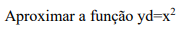


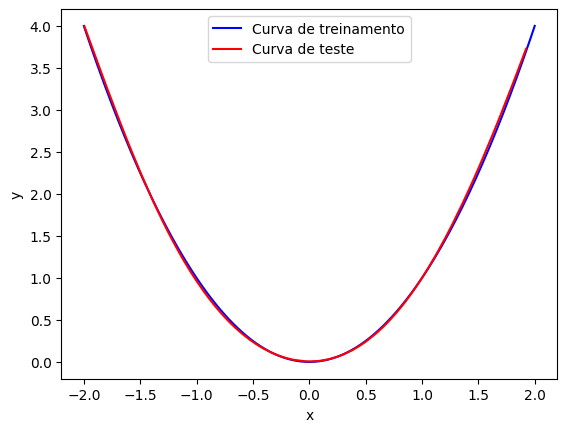

In [ ]:
np.random.seed(0)
x = np.linspace(-2, 2, 200)
y = x**2

num_epocas = 200
alfa = 0.1  # Taxa de aprendizado
m = 3  # Número de regras fuzzy
nPontos = len(x)  # Número de pontos de dados
n = x.ndim # Numero de entradas
c = np.zeros((n, m))  # Matriz de centros para cada regra fuzzy
s = np.zeros((n, m))  # Matriz de larguras para cada regra fuzzy
p = np.random.rand(n, m)  # Matriz de pesos para cada regra fuzzy
q = np.random.rand(m)  # Vetor de offsets para cada regra fuzzy
xmax = np.max(x, axis=0).reshape(-1,1)
xmin = np.min(x, axis=0).reshape(-1,1)
deltai = (xmax - xmin) / (m - 1)  # Calcula o intervalo delta para distribuir os centros das regras fuzzy

for j in range(m):  # Regras fuzzy
    for i in range(n): # Numero de entradas
        c[i, j] = xmin[i] + (j - 1) * deltai
        s[i, j] = deltai / np.sqrt(np.log(4))
        p[i, j] = np.random.rand()

    q[j] = np.random.rand()

c, s, p, q,erro = neuro_fuzzy(x, y, num_epocas, alfa, m,n, c, s, p, q)

import random

x_est =  np.sort([random.uniform(-2, 2) for _ in range(200)])
y_est = np.zeros_like(x_est)

for i in range(nPontos):
    xs = x_est[i]
    ys, _, _,_ = output(xs, c, s, p, q,n,m)
    y_est[i] = ys

plt.plot(x, y, 'b', label='Curva de treinamento')
plt.plot(x_est, y_est, 'r-', label='Curva de teste')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

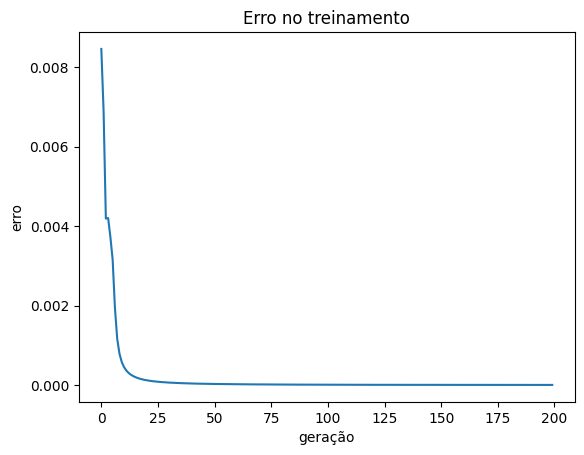

In [ ]:
plt.plot(erro)
plt.ylabel('erro')
plt.xlabel('geração')
plt.title('Erro no treinamento');

In [ ]:
ydes = x_est**2
erro = (np.sum([np.abs((y_est[k] - ydes[k]))/ydes[k] for k in range(200)]))*(1/200)*100
print(f"Erro percentual médio: {erro}")

Erro percentual médio: 40.82196058853579


**Questão 2**


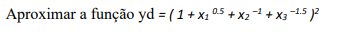


In [ ]:
import itertools
x1 = np.linspace(1,5,10)
x2 = np.linspace(1,6,10)
x3 = np.linspace(1,5,10)

X = np.array(list(itertools.product(x1,x2,x3)))

In [ ]:
print(X)

[[1.         1.         1.        ]
 [1.         1.         1.44444444]
 [1.         1.         1.88888889]
 ...
 [5.         6.         4.11111111]
 [5.         6.         4.55555556]
 [5.         6.         5.        ]]


In [ ]:
len(X)

1000

In [ ]:
YD = (1 + X[:,0]**(1/2) + X[:,1]**(-1) + X[:,2]**(-3/2))**2

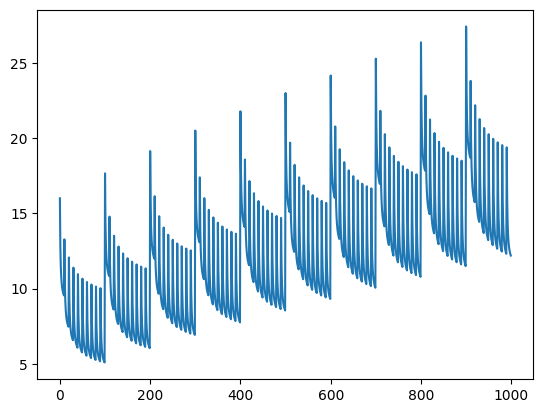

In [ ]:
plt.plot(YD)

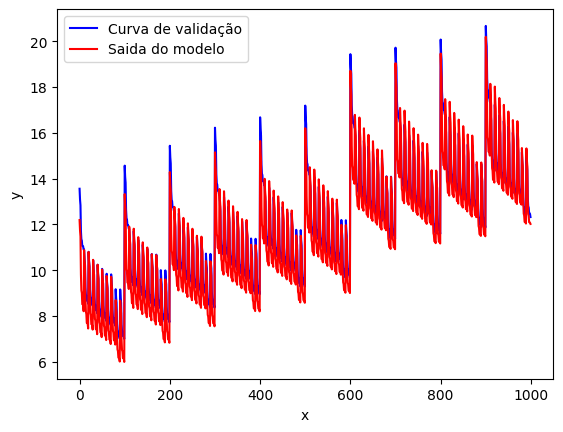

In [ ]:
x = X
y = YD

num_epocas = 100
alfa = 0.01  # Taxa de aprendizado
m = 4  # Número de regras fuzzy
nPontos = x.shape[0]  # Número de pontos de dados
n = x.shape[1] # Numero de entradas
c = np.zeros((n, m))  # Matriz de centros para cada regra fuzzy
s = np.zeros((n, m))  # Matriz de larguras para cada regra fuzzy
p = np.random.rand(n, m)  # Matriz de pesos para cada regra fuzzy
q = np.random.rand(m)  # Vetor de offsets para cada regra fuzzy
xmax = np.max(x, axis=0).reshape(-1,1)
xmin = np.min(x, axis=0).reshape(-1,1)
delta = (xmax - xmin) / (m - 1)  # Calcula o intervalo delta para distribuir os centros das regras fuzzy

for j in range(m):  # Regras fuzzy
    for i in range(n): # Numero de entradas
        c[i, j] = xmin[i] + (j - 1) * delta[i]
        s[i, j] = delta[i] / np.sqrt(np.log(4))
        p[i, j] = np.random.rand()

    q[j] = np.random.rand()

c, s, p, q,erro = neuro_fuzzy(x, y, num_epocas, alfa, m,n, c, s, p, q)

x1 = np.sort([random.uniform(1, 5) for _ in range(10)])
x2 = np.sort([random.uniform(1, 5) for _ in range(10)])
x3 = np.sort([random.uniform(1, 5) for _ in range(10)])


x_est = np.array(list(itertools.product(x1,x2,x3)))
ydv = (1 + x_est[:,0]**(1/2) + x_est[:,1]**(-1) + x_est[:,2]**(-3/2))**2

y_est = np.zeros_like(x_est[:,0])

for i in range(len(x_est)):
    xs = x_est[i,:]
    ys, _, _,_ = output(xs, c, s, p, q,n,m)
    y_est[i] = ys

plt.plot(ydv, 'b', label='Curva de validação')
plt.plot(y_est, 'r-', label='Saida do modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


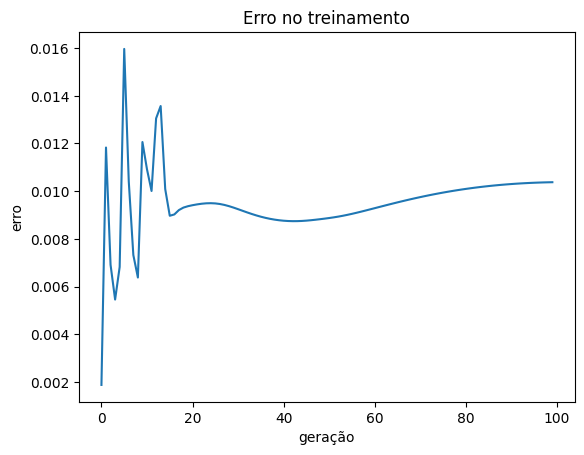

In [ ]:
plt.plot(erro)
plt.ylabel('erro')
plt.xlabel('geração')
plt.title('Erro no treinamento');

In [ ]:
ydes = (1 + x_est[:,0]**(1/2) + x_est[:,1]**(-1) + x_est[:,2]**(-3/2))**2

erro = (np.sum([np.abs((y_est[k] - ydes[k]))/ydes[k] for k in range(1000)]))*(1/1000)*100
print(f"Erro percentual médio: {erro}")

Erro percentual médio: 5.269439608410706


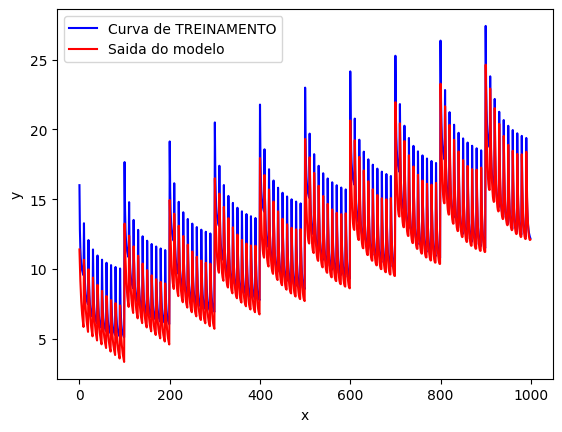

In [ ]:
x_est = X
ydv = YD

y_est = np.zeros_like(x_est[:,0])

for i in range(len(x_est)):
    xs = x_est[i,:]
    ys, _, _,_ = output(xs, c, s, p, q,n,m)
    y_est[i] = ys

plt.plot(ydv, 'b', label='Curva de TREINAMENTO')
plt.plot(y_est, 'r-', label='Saida do modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Exercício 3**

Previsão de séries temporais

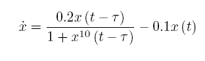

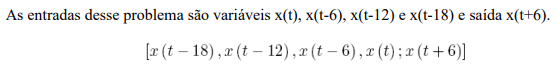

In [ ]:
import pandas as pd

xt = pd.read_csv('data/xt.csv', header=None)
xt = xt.rename(columns={0: 'x(t-18)', 1: 'x(t-12)',2: 'x(t-6)',3: 'x(t)'})

xt2 = pd.read_csv('data/xt2.csv', header=None)
xt4 = pd.read_csv('data/xt4.csv', header=None)
xv = pd.read_csv('data/xv.csv', header=None)
xv4 = pd.read_csv('data/xv4.csv', header=None)

yd = pd.read_csv('data/yd.csv', header=None)
ydt = pd.read_csv('data/ydt.csv', header=None)
ydt4 = pd.read_csv('data/ydt4.csv', header=None)
ydv = pd.read_csv('data/ydv.csv', header=None)
ydv4 = pd.read_csv('data/ydv4.csv', header=None)

Text(0.5, 1.0, 'Y')

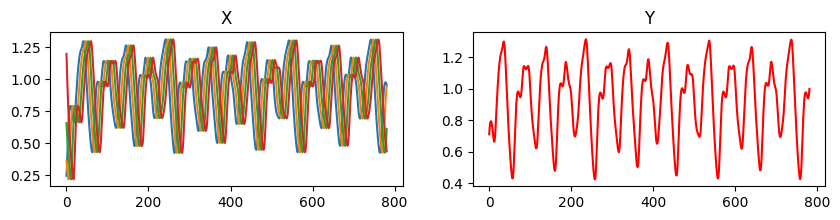

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))

ax1.plot(xt)
ax1.set_title('X')
ax2.plot(ydt, color='red')
ax2.set_title('Y')


Text(0.5, 1.0, 'Y')

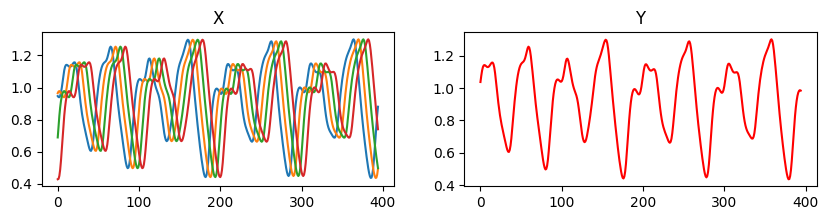

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))

ax1.plot(xv)
ax1.set_title('X')
ax2.plot(ydv, color='red')
ax2.set_title('Y')


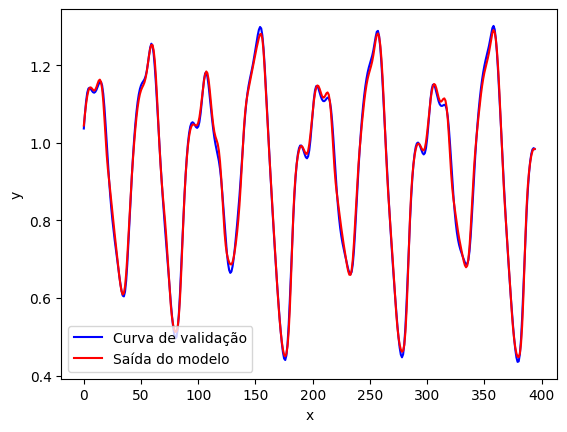

In [ ]:
x = xt.to_numpy()
y = ydt.to_numpy()

num_epocas = 100
alfa = 0.01  # Taxa de aprendizado
m = 4  # Número de regras fuzzy
nPontos = len(x)  # Número de pontos de dados
n = x.shape[1] # Numero de entradas
c = np.zeros((n, m))  # Matriz de centros para cada regra fuzzy
s = np.zeros((n, m))  # Matriz de larguras para cada regra fuzzy
p = np.random.rand(n, m)  # Matriz de pesos para cada regra fuzzy
q = np.random.rand(m)  # Vetor de offsets para cada regra fuzzy
xmax = np.max(x, axis=0).reshape(-1,1)
xmin = np.min(x, axis=0).reshape(-1,1)
delta = (xmax - xmin) / (m - 1)  # Calcula o intervalo delta para distribuir os centros das regras fuzzy

for j in range(m):  # Regras fuzzy
    for i in range(n): # Numero de entradas
        c[i, j] = xmin[i] + (j - 1) * delta[i]
        s[i, j] = delta[i] / np.log(4)
        p[i, j] = np.random.rand()

    q[j] = np.random.rand()

c, s, p, q,erro = neuro_fuzzy(x, y, num_epocas, alfa, m,n, c, s, p, q)

x_est = xv.to_numpy()
y_est = np.zeros_like(x_est[:,0])

for i in range(len(x_est)):
    xs = x_est[i,:]
    ys, _, _,_ = output(xs, c, s, p, q,n,m)
    y_est[i] = ys

plt.plot(ydv, 'b', label='Curva de validação')
plt.plot(y_est, 'r-', label='Saída do modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

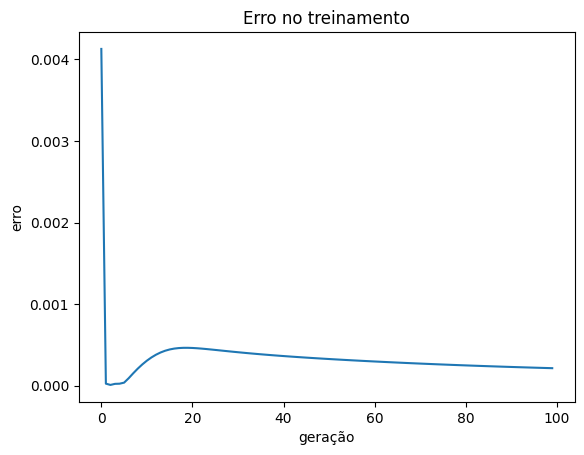

In [ ]:
plt.plot(erro)
plt.ylabel('erro')
plt.xlabel('geração')
plt.title('Erro no treinamento');

In [ ]:
ydes = x_est**2
erro = (np.sum([np.abs((y_est[k] - ydes[k]))/ydes[k] for k in range(200)]))*(1/200)*100
print(f"Erro percentual médio: {erro}")

Erro percentual médio: 272.7722576381244


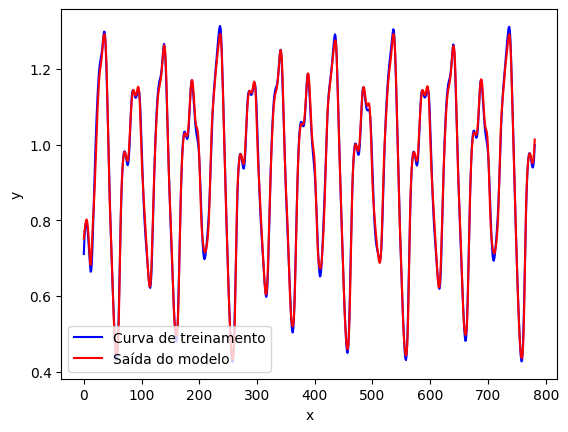

In [ ]:
x_est = xt.to_numpy()
y_est = np.zeros_like(x_est[:,0])

for i in range(len(x_est)):
    xs = x_est[i,:]
    ys, _, _,_ = output(xs, c, s, p, q,n,m)
    y_est[i] = ys

plt.plot(ydt, 'b', label='Curva de treinamento')
plt.plot(y_est, 'r-', label='Saída do modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()